In [1]:
import numpy as np
import pandas as pd 
import ipaddress
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
creditcard_data = pd.read_csv(r"C:\Users\ephre\Documents\Fraud-Detection-for-E-Commerce-and-Banking-Transactions---AI-Solutions\Data\creditcard.csv")
fraud_data = pd.read_csv(r"C:\Users\ephre\Documents\Fraud-Detection-for-E-Commerce-and-Banking-Transactions---AI-Solutions\Data\Fraud_Data.csv")
ip_to_country = pd.read_csv(r"C:\Users\ephre\Documents\Fraud-Detection-for-E-Commerce-and-Banking-Transactions---AI-Solutions\Data\IpAddress_to_Country (1).csv")
pd.set_option('display.max_columns', None)

In [3]:
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
ip_to_country.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [6]:
print("Creadit card 'info' and 'describe'")
print(creditcard_data.info())
print(creditcard_data.describe())

Creadit card 'info' and 'describe'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     28480

In [7]:
print("Creadit card 'info' and 'describe'")

print(fraud_data.info())
print(fraud_data.describe())

Creadit card 'info' and 'describe'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None
             user_id  purchase_value            age    ip_address  \
count  151112.000000   151112.000000  151112.000000  1.511120e+05   
mean   200171.040970       36.935372      33.14070

In [8]:
print("Creadit card 'info' and 'describe'")

print(ip_to_country.info())
print(ip_to_country.describe())

Creadit card 'info' and 'describe'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None
       lower_bound_ip_address  upper_bound_ip_address
count            1.388460e+05            1.388460e+05
mean             2.724532e+09            2.724557e+09
std              8.975215e+08            8.974979e+08
min              1.677722e+07            1.677747e+07
25%              1.919930e+09            1.920008e+09
50%              3.230887e+09            3.230888e+09
75%              3.350465e+09            3.350466e+09
max              3.758096e+09            3.758096e+09


In [9]:
print(creditcard_data.isnull().sum().sum())
print(fraud_data.isnull().sum().sum())
print(ip_to_country.isnull().sum().sum())

0
0
0


In [10]:
# Remove duplicates
fraud_data.drop_duplicates(inplace=True)
creditcard_data.drop_duplicates(inplace=True)
ip_to_country.drop_duplicates(inplace=True)

In [11]:
# Convert column to datetime format
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Convert column to datetime format
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])

# Convert data types as necessary
fraud_data['purchase_value'] = fraud_data['purchase_value'].astype(float)


<Axes: >

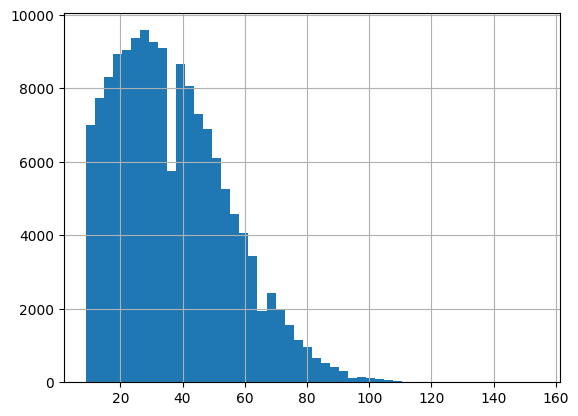

In [12]:
# Univariate analysis - histogram for purchase_value
fraud_data['purchase_value'].hist(bins=50)


<Axes: xlabel='purchase_time', ylabel='purchase_value'>

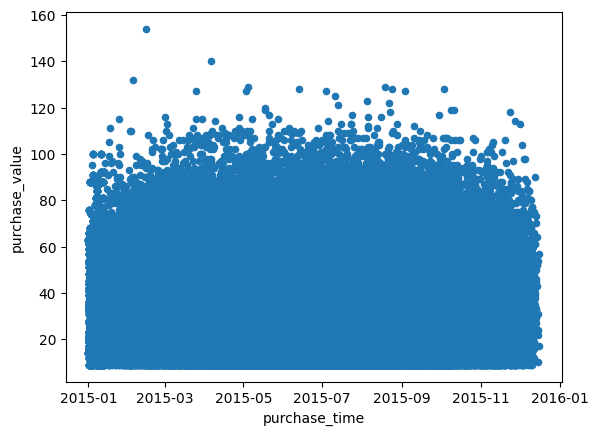

In [13]:
# Bivariate analysis - scatter plot between purchase_value and time
fraud_data.plot.scatter(x='purchase_time', y='purchase_value')

<Axes: xlabel='signup_time', ylabel='purchase_value'>

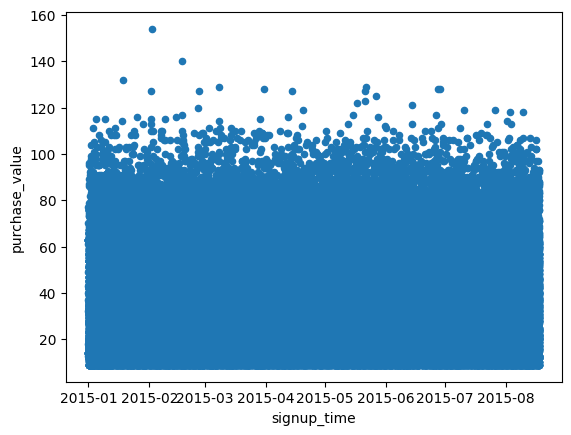

In [14]:
fraud_data.plot.scatter(x='signup_time', y='purchase_value')

In [15]:
# Assuming fraud_data['ip_address'] is already numeric (integer representation)
ip_to_country['lower_bound_ip_address'] = ip_to_country['lower_bound_ip_address'].astype(float).astype(int)
ip_to_country['upper_bound_ip_address'] = ip_to_country['upper_bound_ip_address'].astype(float).astype(int)

# Now, define a function to map IP to a country
def map_country(ip, ip_df):
    result = ip_df[(ip_df['lower_bound_ip_address'] <= ip) & (ip_df['upper_bound_ip_address'] >= ip)]
    return result['country'].values[0] if len(result) > 0 else np.nan

# Apply the function to map the IP addresses to their respective countries
fraud_data['country'] = fraud_data['ip_address'].apply(lambda x: map_country(x, ip_to_country))


In [16]:
import ipaddress

# Convert the ip_address column in fraud_data to integers
fraud_data['ip_address'] = fraud_data['ip_address'].apply(lambda x: int(ipaddress.ip_address(x)) if isinstance(x, str) else x)

# Convert the lower and upper IP address bounds in the ip_to_country DataFrame to integers
ip_to_country['lower_bound_ip_address'] = ip_to_country['lower_bound_ip_address'].apply(lambda x: int(ipaddress.ip_address(x)) if isinstance(x, str) else x)
ip_to_country['upper_bound_ip_address'] = ip_to_country['upper_bound_ip_address'].apply(lambda x: int(ipaddress.ip_address(x)) if isinstance(x, str) else x)

# Now map the country based on IP address
fraud_data['country'] = fraud_data['ip_address'].apply(lambda x: map_country(x, ip_to_country))

In [17]:
fraud_data['transaction_count'] = fraud_data.groupby('user_id')['user_id'].transform('count')

In [18]:
# Create hour of day and day of week features
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek


In [19]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_count,hour_of_day,day_of_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,2,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15.0,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,18,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44.0,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1,13,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39.0,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,18,2


In [20]:
# import pandas as pd
# import numpy as np
# import ipaddress

# # Function to safely convert IP addresses to integers
# def safe_ip_to_int(ip):
#     try:
#         return int(ipaddress.ip_address(ip))
#     except ValueError:
#         return np.nan  # Return NaN for invalid IPs

# # Step 1: Convert IP addresses to integers, safely handling invalid IPs
# fraud_data['ip_address'] = fraud_data['ip_address'].apply(safe_ip_to_int)
# ip_to_country['lower_bound_ip_address'] = ip_to_country['lower_bound_ip_address'].apply(safe_ip_to_int)
# ip_to_country['upper_bound_ip_address'] = ip_to_country['upper_bound_ip_address'].apply(safe_ip_to_int)

# # Step 2: Drop rows with NaN IP addresses in fraud_data and ip_to_country to ensure valid comparisons
# fraud_data.dropna(subset=['ip_address'], inplace=True)
# ip_to_country.dropna(subset=['lower_bound_ip_address', 'upper_bound_ip_address'], inplace=True)

# # Step 3: Perform the range join as before
# def map_country(ip, ip_df):
#     result = ip_df[(ip_df['lower_bound_ip_address'] <= ip) & (ip_df['upper_bound_ip_address'] >= ip)]
#     if len(result) > 0:
#         return result['country'].values[0]
#     return np.nan

# Step 4: Apply the function to map IP addresses to countries
fraud_data['country'] = fraud_data['ip_address'].apply(lambda x: map_country(x, ip_to_country))

# Step 4: Align and merge the datasets
# Rename columns in creditcard_data to match fraud_data
creditcard_data.rename(columns={'Time': 'purchase_time', 'Amount': 'purchase_value', 'Class': 'class'}, inplace=True)

# Add missing columns to both datasets
missing_cols_in_fraud = set(creditcard_data.columns) - set(fraud_data.columns)
missing_cols_in_credit = set(fraud_data.columns) - set(creditcard_data.columns)

for col in missing_cols_in_fraud:
    fraud_data[col] = np.nan
for col in missing_cols_in_credit:
    creditcard_data[col] = np.nan

# Step 5: Append the datasets
combined_data = pd.concat([fraud_data, creditcard_data], ignore_index=True)

# Inspect the merged dataset
combined_data.head()

C:\Users\ephre\AppData\Local\Temp\ipykernel_27772\1143368016.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_data = pd.concat([fraud_data, creditcard_data], ignore_index=True)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_count,hour_of_day,day_of_week,V16,V24,V28,V18,V2,V12,V11,V3,V1,V22,V26,V19,V6,V23,V5,V13,V9,V27,V10,V21,V15,V25,V4,V17,V7,V20,V14,V8
0,22058.0,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39.0,7.327584e+08,0,Japan,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,333320.0,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53.0,3.503114e+08,0,United States,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1359.0,2015-01-01 18:52:44,2015-01-01 18:52:45,15.0,YSSKYOSJHPPLJ,SEO,Opera,M,53.0,2.621474e+09,1,United States,1.0,18.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,150084.0,2015-04-28 21:13:25,2015-05-04 13:54:50,44.0,ATGTXKYKUDUQN,SEO,Safari,M,41.0,3.840542e+09,0,NaN,1.0,13.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,221365.0,2015-07-21 07:09:52,2015-09-09 18:40:53,39.0,NAUITBZFJKHWW,Ads,Safari,M,45.0,4.155831e+08,0,United States,1.0,18.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
combined_data.sample(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_count,hour_of_day,day_of_week,V16,V24,V28,V18,V2,V12,V11,V3,V1,V22,V26,V19,V6,V23,V5,V13,V9,V27,V10,V21,V15,V25,V4,V17,V7,V20,V14,V8
97101,115946.0,2015-05-05 23:15:25,2015-08-05 23:50:24,21.00,LKAMTMHORMNSX,Ads,IE,F,33.0,2.646133e+09,0,United States,1.0,23.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431010,NaN,NaT,169854.0,1.79,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.266759,0.591523,-0.028278,-0.423353,0.221304,0.612706,-0.392678,-1.671572,2.073301,-0.868557,0.166763,0.034816,-0.879511,0.333532,0.475837,0.914765,0.362129,-0.057063,-0.403377,-0.352621,0.108902,-0.233498,0.416995,0.436402,0.244396,-0.102103,-1.012831,-0.287318
290156,NaN,NaT,83220.0,184.29,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.248375,-0.858288,-0.369346,1.636369,-4.748818,0.829320,-0.121720,0.534662,-4.782025,0.932053,-0.630104,1.365262,-1.570926,2.625345,1.414752,-0.331466,1.965212,0.386355,-2.231585,0.044526,0.686071,1.291121,-2.171761,-0.886532,-0.767184,-0.522730,0.172393,0.591899
208344,NaN,NaT,47923.0,60.98,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,-0.008255,0.080134,0.012161,-0.492080,-0.173881,-0.654789,-0.399137,0.223811,1.116424,0.099098,0.564241,-0.582231,-0.586674,-0.072160,-0.500237,-1.636604,0.348313,-0.049143,-0.064316,0.080766,1.448903,0.346051,0.570161,0.005618,-0.061013,-0.124638,0.652723,-0.009370
20800,27113.0,2015-02-18 08:59:40,2015-03-28 06:46:41,71.00,MZPPDMNHMUXAA,Ads,IE,M,37.0,2.890302e+09,0,NaN,1.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204694,NaN,NaT,46158.0,9.99,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.089297,0.957750,-0.058646,0.339283,0.788955,-0.330057,-0.132156,0.075370,-0.181863,-0.568460,-0.663234,0.893569,3.619088,-0.041107,2.647524,-0.033673,-0.514214,-0.109860,0.125836,-0.189665,1.359900,-0.457883,-0.364340,-0.852967,0.333134,0.170477,0.197099,0.632244
136635,350153.0,2015-03-29 20:02:19,2015-05-27 03:01:12,28.00,LIHVJNSHBFHYI,Direct,Chrome,F,49.0,3.033254e+09,0,China,1.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192880,NaN,NaT,40894.0,7.57,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.202674,-0.079111,0.017516,-0.457435,0.435966,0.436205,-1.324099,0.687648,1.186410,-0.064319,0.105759,-0.435280,0.153607,-0.153773,-0.046870,0.773449,-0.283825,0.012668,0.494488,-0.101381,-0.949168,0.717587,2.624685,-0.374504,-0.008691,-0.102798,-0.376546,-0.026062
223307,NaN,NaT,54724.0,55.60,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,-0.201361,-0.056521,0.012224,-0.447096,0.468199,0.824846,-1.218321,1.035048,-1.389036,-0.337440,0.260620,0.541052,-0.584535,-0.066495,0.236840,1.284764,-0.367433,0.195690,-0.756947,-0.077064,-0.531090,0.128562,0.268060,-0.015315,0.255011,0.368716,-0.104465,0.400626
107719,4323.0,2015-01-09 11:55:56,2015-01-09 11:55:57,37.00,BLNDGSQXIWKUG,SEO,FireFox,M,20.0,2.207580e+09,1,Canada,1.0,11.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434838 entries, 0 to 434837
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user_id            151112 non-null  float64       
 1   signup_time        151112 non-null  datetime64[ns]
 2   purchase_time      434838 non-null  object        
 3   purchase_value     434838 non-null  float64       
 4   device_id          151112 non-null  object        
 5   source             151112 non-null  object        
 6   browser            151112 non-null  object        
 7   sex                151112 non-null  object        
 8   age                151112 non-null  float64       
 9   ip_address         151112 non-null  float64       
 10  class              434838 non-null  int64         
 11  country            129146 non-null  object        
 12  transaction_count  151112 non-null  float64       
 13  hour_of_day        151112 non-null  float64 

In [23]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# # Columns to scale
# numerical_columns = ['purchase_value', 'age', 'transaction_count', 'hour_of_day', 'day_of_week']  # Add more numerical columns as needed

# # Standardization
# scaler = StandardScaler()
# combined_data[numerical_columns] = scaler.fit_transform(combined_data[numerical_columns])

# # OR MinMax Scaling
# # scaler = MinMaxScaler()
# # combined_data[numerical_columns] = scaler.fit_transform(combined_data[numerical_columns])


In [24]:
# Example of filling missing values
combined_data['country'].fillna('Unknown', inplace=True)  # For categorical columns



C:\Users\ephre\AppData\Local\Temp\ipykernel_27772\20535005.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['country'].fillna('Unknown', inplace=True)  # For categorical columns


In [25]:
combined_data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'country', 'transaction_count', 'hour_of_day', 'day_of_week', 'V16',
       'V24', 'V28', 'V18', 'V2', 'V12', 'V11', 'V3', 'V1', 'V22', 'V26',
       'V19', 'V6', 'V23', 'V5', 'V13', 'V9', 'V27', 'V10', 'V21', 'V15',
       'V25', 'V4', 'V17', 'V7', 'V20', 'V14', 'V8'],
      dtype='object')

In [26]:
# Convert to datetime and extract useful features
combined_data['signup_time'] = pd.to_datetime(combined_data['signup_time'])
combined_data['purchase_time'] = pd.to_datetime(combined_data['purchase_time'])

combined_data['signup_month'] = combined_data['signup_time'].dt.month
combined_data['signup_day'] = combined_data['signup_time'].dt.day
combined_data['signup_hour'] = combined_data['signup_time'].dt.hour

combined_data['purchase_month'] = combined_data['purchase_time'].dt.month
combined_data['purchase_day'] = combined_data['purchase_time'].dt.day
combined_data['purchase_hour'] = combined_data['purchase_time'].dt.hour


In [27]:
print(combined_data.info())  # Check final structure of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434838 entries, 0 to 434837
Data columns (total 49 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user_id            151112 non-null  float64       
 1   signup_time        151112 non-null  datetime64[ns]
 2   purchase_time      434838 non-null  datetime64[ns]
 3   purchase_value     434838 non-null  float64       
 4   device_id          151112 non-null  object        
 5   source             151112 non-null  object        
 6   browser            151112 non-null  object        
 7   sex                151112 non-null  object        
 8   age                151112 non-null  float64       
 9   ip_address         151112 non-null  float64       
 10  class              434838 non-null  int64         
 11  country            434838 non-null  object        
 12  transaction_count  151112 non-null  float64       
 13  hour_of_day        151112 non-null  float64 

In [28]:
combined_data.sample(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_count,hour_of_day,day_of_week,V16,V24,V28,V18,V2,V12,V11,V3,V1,V22,V26,V19,V6,V23,V5,V13,V9,V27,V10,V21,V15,V25,V4,V17,V7,V20,V14,V8,signup_month,signup_day,signup_hour,purchase_month,purchase_day,purchase_hour
417703,NaN,NaT,1970-01-01 00:00:00.000162828,1.00,NaN,NaN,NaN,NaN,NaN,NaN,0,Unknown,NaN,NaN,NaN,0.462148,-0.553686,-0.061753,-0.234770,-0.223371,0.525289,0.502117,-0.813596,2.003821,-1.391649,-0.255173,0.491119,-0.391738,0.492650,-0.164969,-0.969507,0.617337,-0.045318,0.242878,-0.486059,-0.285435,-0.644492,0.353098,-0.685617,-0.243981,-0.277868,0.547161,0.040401,NaN,NaN,NaN,1,1,0
15706,87684.0,2015-01-11 17:29:03,2015-01-11 17:29:04.000000000,60.00,GKUTHNSWBTVKT,Ads,IE,F,21.0,2.121749e+09,1,Japan,1.0,17.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,11.0,17.0,1,11,17
22958,333361.0,2015-02-23 16:52:14,2015-06-06 05:23:18.000000000,52.00,AXRVOSBRXINZV,SEO,Chrome,F,18.0,1.515584e+09,0,France,1.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,23.0,16.0,6,6,5
55759,293521.0,2015-04-06 00:28:56,2015-05-18 12:43:45.000000000,25.00,SDKDVRGCPHXMO,Direct,IE,M,43.0,3.645598e+09,0,Sweden,1.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0,0.0,5,18,12
122582,47882.0,2015-05-30 22:42:49,2015-06-14 03:43:42.000000000,33.00,IOEMCCXSDJUHK,Direct,IE,M,30.0,2.004548e+09,0,China,1.0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,30.0,22.0,6,14,3
63504,38859.0,2015-01-10 03:26:33,2015-04-10 13:31:16.000000000,39.00,WJFDLASHGYOYI,SEO,IE,M,35.0,1.087931e+09,0,United States,1.0,13.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,3.0,4,10,13
254005,NaN,NaT,1970-01-01 00:00:00.000068583,44.90,NaN,NaN,NaN,NaN,NaN,NaN,0,Unknown,NaN,NaN,NaN,1.957721,-1.813037,0.017951,-0.509325,-0.529702,-0.698842,0.405591,-0.557974,1.364350,-0.677250,-0.362927,1.049906,0.601104,-0.104466,0.090714,-0.025959,-0.895652,0.023279,0.341340,-0.165614,0.601991,0.335309,-1.070574,0.380705,-0.693419,0.181603,-0.914139,0.209674,NaN,NaN,NaN,1,1,0
286455,NaN,NaT,1970-01-01 00:00:00.000081424,7.99,NaN,NaN,NaN,NaN,NaN,NaN,0,Unknown,NaN,NaN,NaN,-0.191508,0.299021,0.028821,-1.191890,0.392417,0.228639,0.170118,0.474106,1.161170,-1.283884,-0.827621,-0.637416,-0.736860,0.301258,-0.222905,-0.579934,-0.147499,0.023370,0.002356,-0.425370,1.155808,0.112485,1.239054,-0.000921,0.236327,-0.214102,0.620435,-0.081352,NaN,NaN,NaN,1,1,0
414552,NaN,NaT,1970-01-01 00:00:00.000161416,8.98,NaN,NaN,NaN,NaN,NaN,NaN,0,Unknown,NaN,NaN,NaN,0.099773,0.569388,-0.364017,-0.207810,1.063589,-0.575621,-0.525951,0.975137,-0.601397,-1.035966,0.221744,0.037849,-0.562500,-0.375539,1.382773,-0.257036,-0.267223,-0.506618,-0.856626,-0.445238,0.003980,0.470238,-0.822576,0.265778,1.599704,0.123506,-1.376062,-0.582257,NaN,NaN,NaN,1,1,0
249811,NaN,NaT,1970-01-01 00:00:00.000066952,8.99,NaN,NaN,NaN,NaN,NaN,NaN,0,Unknown,NaN,NaN,NaN,0.769373,-0.668118,0.064294,0.177481,1.475283,-0.093723,-1.188949,0.395789,-0.887891,-0.892224,0.140162,0.251878,-0.491858,-0.101940,0.204617,0.630266,-0.339805,0.243288,-0.432115,-0.317091,0.919431,0.052145,-0.170736,-0.213195,0.328177,0.177087,-0.295526,0.410447,NaN,NaN,NaN,1,1,0


In [29]:
combined_data.isnull().sum()

user_id              283726
signup_time          283726
purchase_time             0
purchase_value            0
device_id            283726
source               283726
browser              283726
sex                  283726
age                  283726
ip_address           283726
class                     0
country                   0
transaction_count    283726
hour_of_day          283726
day_of_week          283726
V16                  151112
V24                  151112
V28                  151112
V18                  151112
V2                   151112
V12                  151112
V11                  151112
V3                   151112
V1                   151112
V22                  151112
V26                  151112
V19                  151112
V6                   151112
V23                  151112
V5                   151112
V13                  151112
V9                   151112
V27                  151112
V10                  151112
V21                  151112
V15                 

In [30]:
combined_data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'country', 'transaction_count', 'hour_of_day', 'day_of_week', 'V16',
       'V24', 'V28', 'V18', 'V2', 'V12', 'V11', 'V3', 'V1', 'V22', 'V26',
       'V19', 'V6', 'V23', 'V5', 'V13', 'V9', 'V27', 'V10', 'V21', 'V15',
       'V25', 'V4', 'V17', 'V7', 'V20', 'V14', 'V8', 'signup_month',
       'signup_day', 'signup_hour', 'purchase_month', 'purchase_day',
       'purchase_hour'],
      dtype='object')

In [31]:
# Fill missing values in numerical columns with the mean
combined_data['age'] = combined_data['age'].fillna(combined_data['age'].mean())
combined_data['transaction_count'] = combined_data['transaction_count'].fillna(combined_data['transaction_count'].mean())

# Fill missing values in categorical columns with the mode
combined_data['sex'] = combined_data['sex'].fillna(combined_data['sex'].mode()[0])
combined_data['browser'] = combined_data['browser'].fillna(combined_data['browser'].mode()[0])


In [32]:
# Drop columns with more than 65% missing values
combined_data = combined_data.dropna(thresh=combined_data.shape[0] * 0.35, axis=1)


In [33]:
combined_data.sample(10)

,purchase_time,purchase_value,browser,sex,age,class,country,transaction_count,V16,V24,V28,V18,V2,V12,V11,V3,V1,V22,V26,V19,V6,V23,V5,V13,V9,V27,V10,V21,V15,V25,V4,V17,V7,V20,V14,V8,purchase_month,purchase_day,purchase_hour
217972,1970-01-01 00:00:00.000052378,6.15,Chrome,M,33.140704,0,Unknown,1.0,0.355831,-0.429030,0.136982,0.055598,1.078512,0.388396,-1.169693,1.060645,-0.435872,0.347634,-0.478752,-0.570852,-0.506893,-0.333547,0.909624,1.438455,-0.689205,0.128376,-0.653240,0.108345,0.164650,0.165110,-0.117238,-1.057892,1.055503,-0.036012,-0.067574,-0.190940,1,1,0
383843,1970-01-01 00:00:00.000147626,0.89,Chrome,M,33.140704,0,Unknown,1.0,0.681678,-0.019518,-0.046960,0.417785,0.055051,0.362678,0.596994,-1.896548,2.067506,-0.969143,0.186320,0.529374,-0.293175,0.275256,0.658051,-0.523308,0.356629,-0.070828,-0.190934,-0.352084,-0.395418,-0.243083,0.192777,0.080047,0.031220,-0.168598,-0.560136,-0.024797,1,1,0
238624,1970-01-01 00:00:00.000061864,1.00,Chrome,M,33.140704,0,Unknown,1.0,-0.494402,0.086129,0.006747,-0.779596,0.431590,0.128390,-0.195659,-0.146889,1.234721,0.154737,-0.265592,-0.609125,-0.732000,-0.111275,0.194456,-0.349065,-0.233198,0.006539,0.011213,0.026494,0.969517,0.769011,1.060347,-0.015503,0.451466,-0.209017,0.656871,-0.198460,1,1,0
25242,2015-07-02 14:44:21.000000000,38.00,FireFox,M,37.000000,0,United Kingdom,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2,14
26720,2015-05-08 21:17:52.000000000,34.00,IE,M,24.000000,0,Japan,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,8,21
79993,2015-08-23 16:49:27.000000000,27.00,Safari,M,37.000000,0,United States,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,23,16
387087,1970-01-01 00:00:00.000148987,368.54,Chrome,M,33.140704,0,Unknown,1.0,0.864757,0.609994,0.027161,-0.727531,-0.498560,0.048768,-1.202876,-1.176075,1.242204,-1.013477,-0.411783,-1.392041,0.254794,0.052413,0.361610,0.538639,-1.094441,-0.107488,1.244473,-0.062080,-0.838038,-0.340549,3.954839,-0.803565,0.772584,0.502622,0.243011,-0.183045,1,1,0
100449,2015-02-26 21:21:27.000000000,42.00,Chrome,M,44.000000,0,Romania,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,26,21
237315,1970-01-01 00:00:00.000061271,71.88,Chrome,M,33.140704,0,Unknown,1.0,0.542526,0.996755,0.015903,-0.127902,1.486807,0.298390,-0.902356,-0.531689,-1.994953,-1.300164,0.258363,0.075660,3.858390,-0.040767,1.412254,-0.214910,-0.225686,0.186222,-0.852535,0.437189,-0.552290,0.656669,-1.572763,-0.308901,-0.581448,-0.148475,0.438825,1.075396,1,1,0
19436,2015-02-02 13:11:18.000000000,27.00,IE,M,40.000000,0,China,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,13


In [34]:
combined_data.isnull().sum()

purchase_time             0
purchase_value            0
browser                   0
sex                       0
age                       0
class                     0
country                   0
transaction_count         0
V16                  151112
V24                  151112
V28                  151112
V18                  151112
V2                   151112
V12                  151112
V11                  151112
V3                   151112
V1                   151112
V22                  151112
V26                  151112
V19                  151112
V6                   151112
V23                  151112
V5                   151112
V13                  151112
V9                   151112
V27                  151112
V10                  151112
V21                  151112
V15                  151112
V25                  151112
V4                   151112
V17                  151112
V7                   151112
V20                  151112
V14                  151112
V8                  

In [35]:
# Drop rows with missing values
combined_data_clean = combined_data.dropna()

In [38]:
combined_data_clean.isnull().sum()

purchase_time        0
purchase_value       0
browser              0
sex                  0
age                  0
class                0
country              0
transaction_count    0
V16                  0
V24                  0
V28                  0
V18                  0
V2                   0
V12                  0
V11                  0
V3                   0
V1                   0
V22                  0
V26                  0
V19                  0
V6                   0
V23                  0
V5                   0
V13                  0
V9                   0
V27                  0
V10                  0
V21                  0
V15                  0
V25                  0
V4                   0
V17                  0
V7                   0
V20                  0
V14                  0
V8                   0
purchase_month       0
purchase_day         0
purchase_hour        0
dtype: int64